In [15]:
import pandas as pd
import matplotlib.pyplot as plt

class DataSet:

    def __init__(self, train=None, test=None):
        self.df_train = pd.read_csv(train)
        self.df_test = pd.read_csv(test)

    def print_summary_statics(self):
        describe_df = self.df_train.describe()
        # print(describe_df)
        for i in range(0, len(describe_df.columns), 2):
            print(describe_df.loc[:, describe_df.columns[i:i+2]])

    def plot_summary_statics(self):
        notna_counts = self.df_train.notna().sum()
        self.show_plot(notna_counts)

    def print_summary_statics_without_notna(self, attributes):
        final_cols = []
        for attribute in attributes:
            columns = [col for col in self.df_train.columns if col.startswith(attribute)]
            final_cols += columns
        df_new = self.df_train.dropna(subset=final_cols)
        # df_new = df_new.dropna(axis=1, how='all')
        describe_df = df_new.describe()
        # print(describe_df)
        for i in range(0, len(describe_df.columns), 2):
            print(describe_df.loc[:, describe_df.columns[i:i+2]])

    def plot_summary_statics_without_notna(self, attributes):
        final_cols = []
        for attribute in attributes:
            columns = [col for col in self.df_train.columns if col.startswith(attribute)]
            final_cols += columns
        df_new = self.df_train.dropna(subset=final_cols)
        # df_new = df_new.dropna(axis=1, how='all')
        notna_counts = df_new.notna().sum()
        self.show_plot(notna_counts)

    def plot_drop(self, attributes):
        final_cols = []
        for attribute in attributes:
            columns = [col for col in self.df_train.columns if col.startswith(attribute)]
            final_cols += columns
        df_new = self.df_train.drop(columns=final_cols, errors='ignore')
        notna_counts = df_new.notna().sum()
        self.show_plot(notna_counts)
    
    def show_plot(self, df):
        plt.figure(figsize=(10, 6))
        df.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Non-NA Counts per Column in Filtered DataFrame')
        plt.xlabel('Columns')
        plt.ylabel('Non-NA Counts')
        plt.xticks(rotation=90, fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        



In [22]:
def data_clean(train):
    pass
    df_train = pd.read_csv(train)
    df_sii = df_train[df_train['sii'].notna()]
    df_sii = df_sii.copy()
    df_sii['PAQ_Result'] = df_sii['PAQ_A-PAQ_A_Total'].combine_first(df_sii['PAQ_C-PAQ_C_Total'])
    df_sii['PAQ_Season'] = df_sii['PAQ_A-Season'].combine_first(df_sii['PAQ_C-Season'])
    columns_to_drop = ['Physical-Waist_Circumference'] + \
                  [f'PCIAT-PCIAT_{i:02d}' for i in range(1, 21)] + \
                  ['PCIAT-Season']  + \
                  ['PCIAT-PCIAT_Total'] + \
                  ['PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total', 'PAQ_A-Season', 'PAQ_C-Season']
    
    df_sii = df_sii.drop(columns=columns_to_drop, errors='ignore')

    df_sii.to_csv('datasets/train_clean.csv', index=False)

    # # drop FGC, Fitness_Endurance
    # if 1:
    #     columns = [col for col in df_sii.columns if col.startswith('FGC')] + [col for col in df_sii.columns if col.startswith('Fitness_Endurance')]
    #     df_sii = df_sii.drop(columns=columns, errors='ignore')
    columns_to_remove = [
    "Fitness_Endurance-Season", "Fitness_Endurance-Max_Stage", 
    "Fitness_Endurance-Time_Mins", "Fitness_Endurance-Time_Sec",
    "FGC-Season", "FGC-FGC_CU", "FGC-FGC_CU_Zone", 
    "FGC-FGC_GSND", "FGC-FGC_GSND_Zone", 
    "FGC-FGC_GSD", "FGC-FGC_GSD_Zone"
    ]

    df_sii = df_sii.drop(columns=columns_to_remove, errors='ignore')

    df_sii.to_csv('datasets/train_clean_without_fitness_FGC.csv', index=False)
    
data_clean('datasets/train.csv')

In [ ]:
print(pd.read_csv("datasets/train_clean.csv").info())


In [ ]:
print(pd.read_csv("datasets/train_drop2.csv").info())

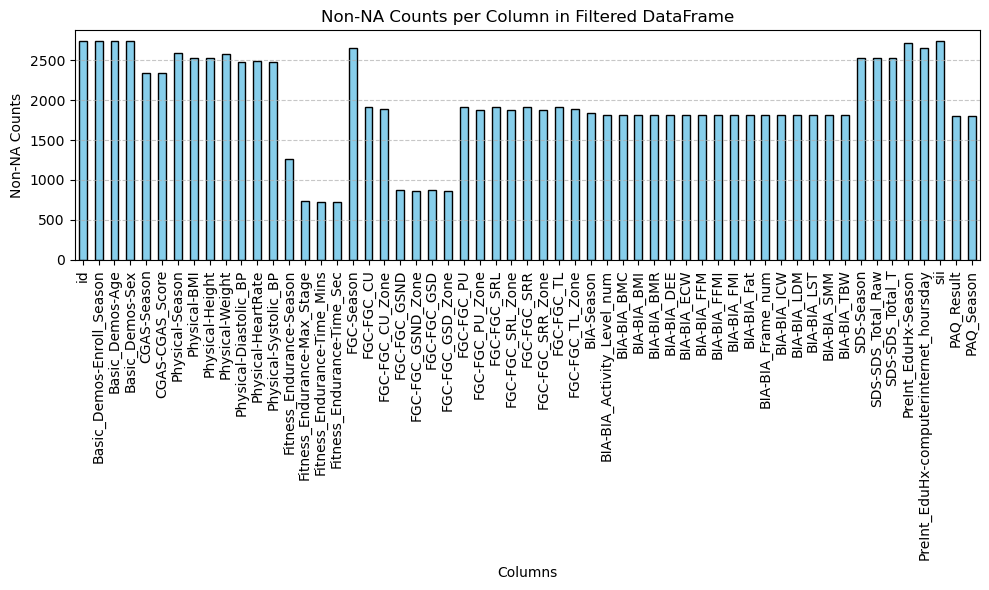

       Basic_Demos-Age  Basic_Demos-Sex
count      2736.000000      2736.000000
mean         10.238670         0.364401
std           3.427982         0.481350
min           5.000000         0.000000
25%           8.000000         0.000000
50%          10.000000         0.000000
75%          12.000000         1.000000
max          22.000000         1.000000
       CGAS-CGAS_Score  Physical-BMI
count      2342.000000   2527.000000
mean         65.159266     19.125667
std          11.811050      4.909305
min          25.000000      0.000000
25%          59.000000     15.773447
50%          65.000000     17.819010
75%          75.000000     21.172311
max          95.000000     46.102914
       Physical-Height  Physical-Weight
count      2530.000000      2572.000000
mean         55.897051        87.839592
std           7.394938        43.353079
min          36.000000         0.000000
25%          50.050000        57.200000
50%          55.000000        75.800000
75%          61.750000     

In [20]:
data = DataSet('datasets/train_clean.csv', 'datasets/test.csv')
data.plot_summary_statics()
data.print_summary_statics()

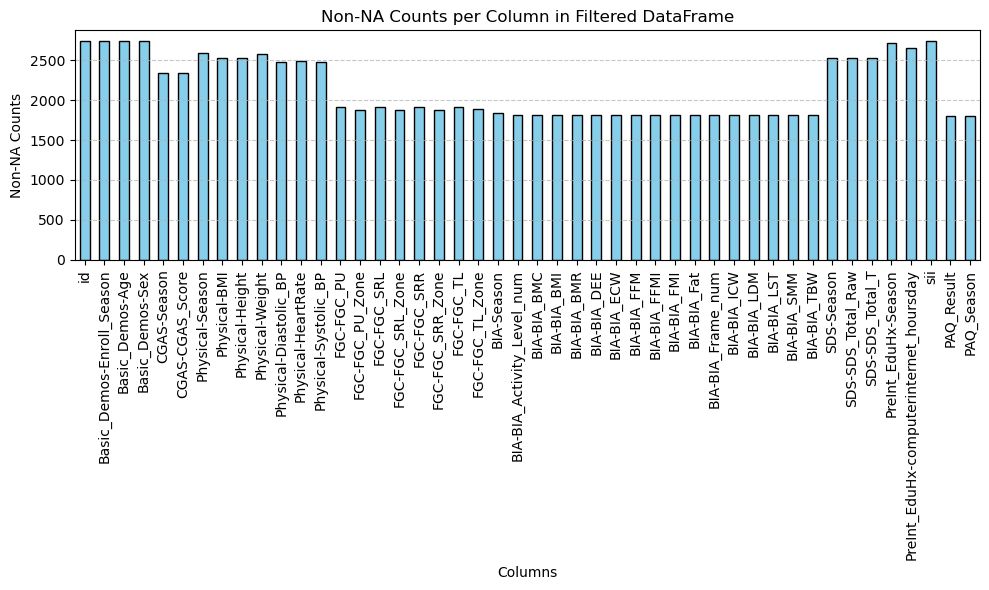

       Basic_Demos-Age  Basic_Demos-Sex
count      2736.000000      2736.000000
mean         10.238670         0.364401
std           3.427982         0.481350
min           5.000000         0.000000
25%           8.000000         0.000000
50%          10.000000         0.000000
75%          12.000000         1.000000
max          22.000000         1.000000
       CGAS-CGAS_Score  Physical-BMI
count      2342.000000   2527.000000
mean         65.159266     19.125667
std          11.811050      4.909305
min          25.000000      0.000000
25%          59.000000     15.773447
50%          65.000000     17.819010
75%          75.000000     21.172311
max          95.000000     46.102914
       Physical-Height  Physical-Weight
count      2530.000000      2572.000000
mean         55.897051        87.839592
std           7.394938        43.353079
min          36.000000         0.000000
25%          50.050000        57.200000
50%          55.000000        75.800000
75%          61.750000     

In [25]:
data2 = DataSet('datasets/train_clean_without_fitness_FGC.csv', 'datasets/test.csv')
data2.plot_summary_statics()
data2.print_summary_statics()

In [32]:
# time to make a version of dataset based on train_clean_without_fitness_FGC.csv a dataset with complete values for each column, around 1800 rows expected
df_sii = pd.read_csv("datasets/train_clean_without_fitness_FGC.csv")
df_cleaned = df_sii.dropna()
df_cleaned.to_csv('datasets/1_COMPLETE_train_clean_without_fitness_FGC_no_nulls.csv', index=False)

print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 3 to 2734
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      802 non-null    object 
 1   Basic_Demos-Enroll_Season               802 non-null    object 
 2   Basic_Demos-Age                         802 non-null    int64  
 3   Basic_Demos-Sex                         802 non-null    int64  
 4   CGAS-Season                             802 non-null    object 
 5   CGAS-CGAS_Score                         802 non-null    float64
 6   Physical-Season                         802 non-null    object 
 7   Physical-BMI                            802 non-null    float64
 8   Physical-Height                         802 non-null    float64
 9   Physical-Weight                         802 non-null    float64
 10  Physical-Diastolic_BP                   802 non-null    float64
 1

In [37]:
df = pd.read_csv('datasets/train_clean_without_fitness_FGC.csv')

# Drop rows with more than 5 missing values
df_cleaned = df.dropna(thresh=len(df.columns) - 5)

# Optional: Save the cleaned DataFrame to a new CSV
df_cleaned.to_csv('datasets/2_train_dropped_over_5_nulls.csv', index=False)

# Check the result
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1507 entries, 1 to 2734
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      1507 non-null   object 
 1   Basic_Demos-Enroll_Season               1507 non-null   object 
 2   Basic_Demos-Age                         1507 non-null   int64  
 3   Basic_Demos-Sex                         1507 non-null   int64  
 4   CGAS-Season                             1309 non-null   object 
 5   CGAS-CGAS_Score                         1309 non-null   float64
 6   Physical-Season                         1507 non-null   object 
 7   Physical-BMI                            1507 non-null   float64
 8   Physical-Height                         1507 non-null   float64
 9   Physical-Weight                         1507 non-null   float64
 10  Physical-Diastolic_BP                   1485 non-null   float64
 

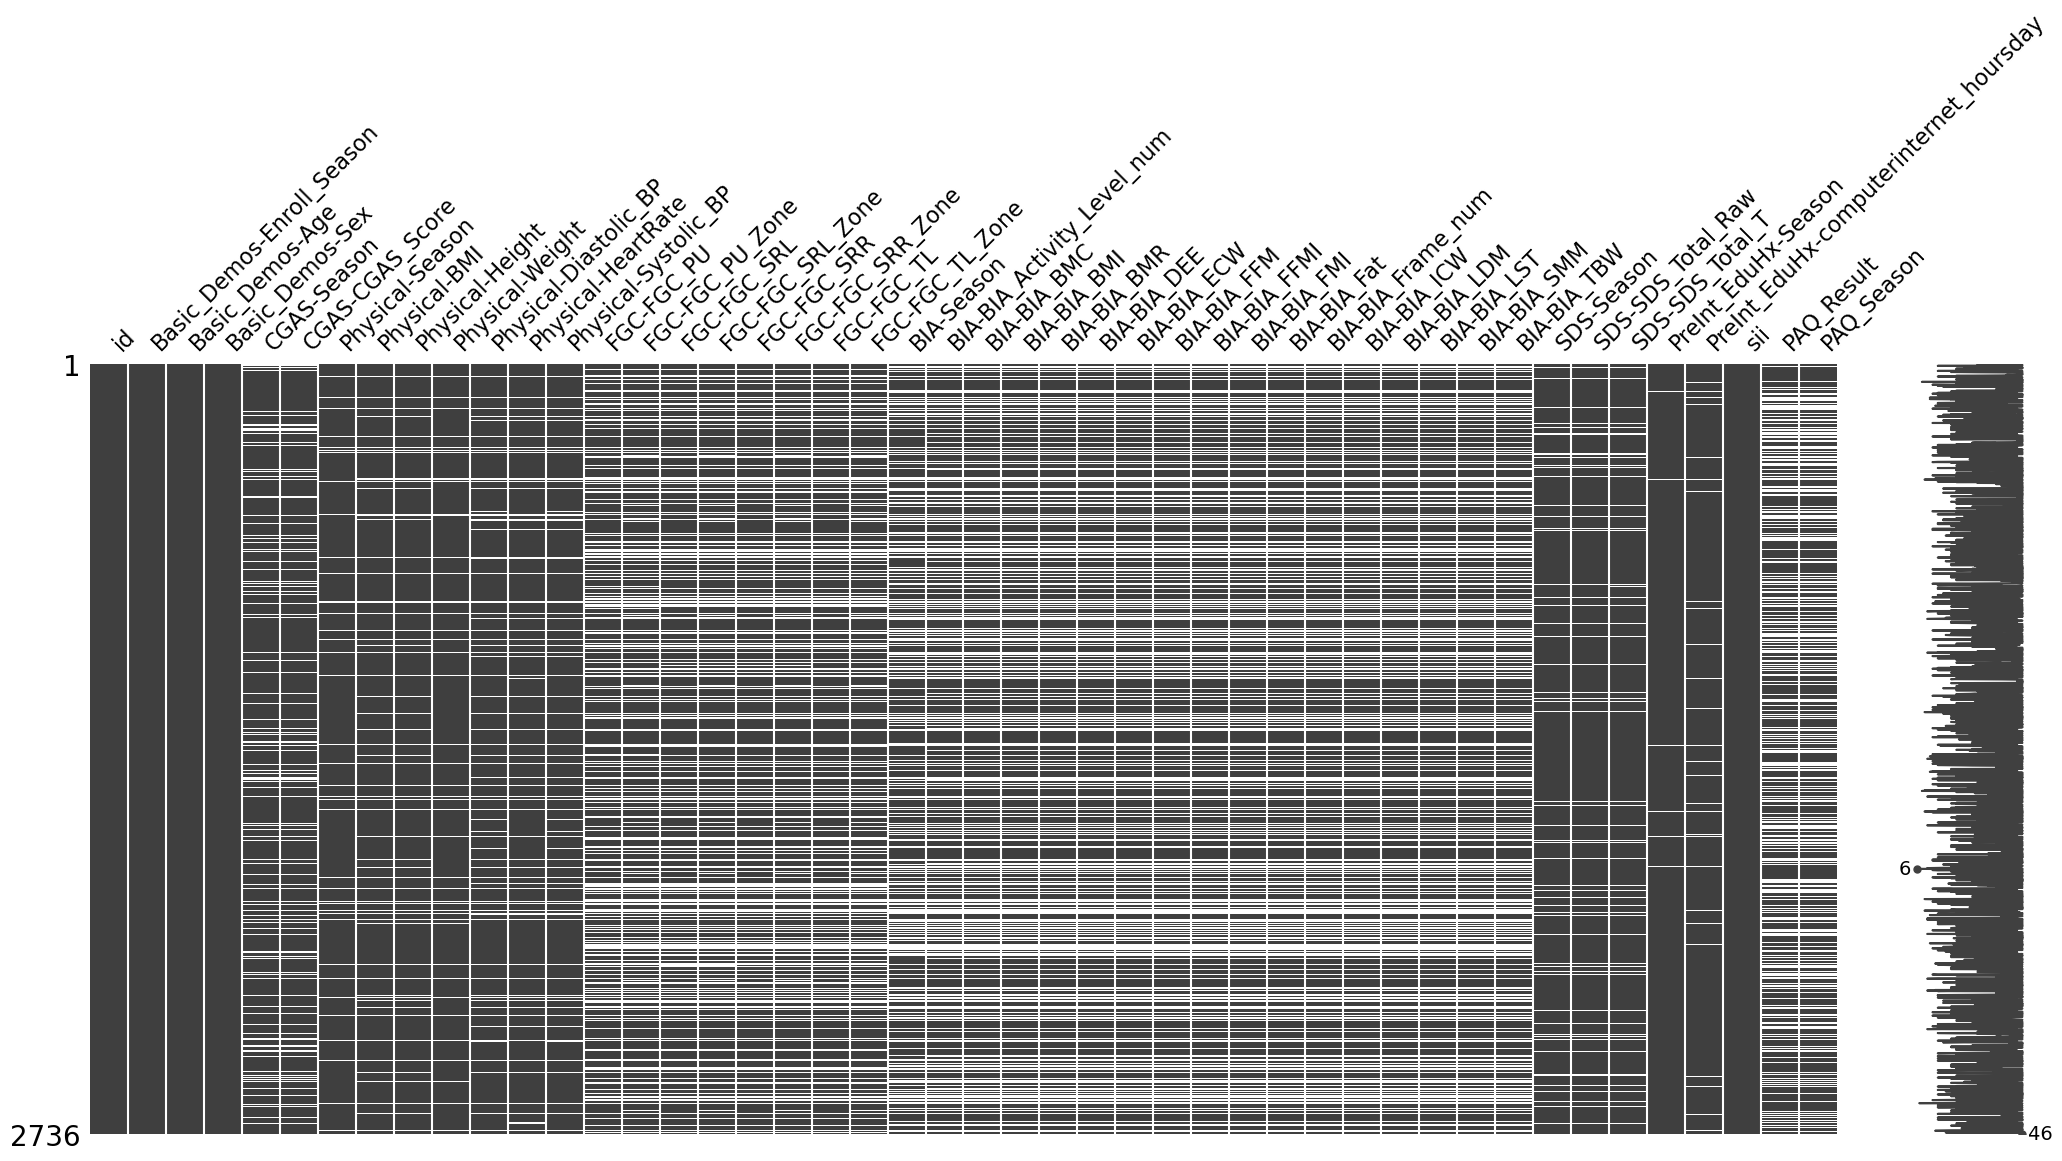

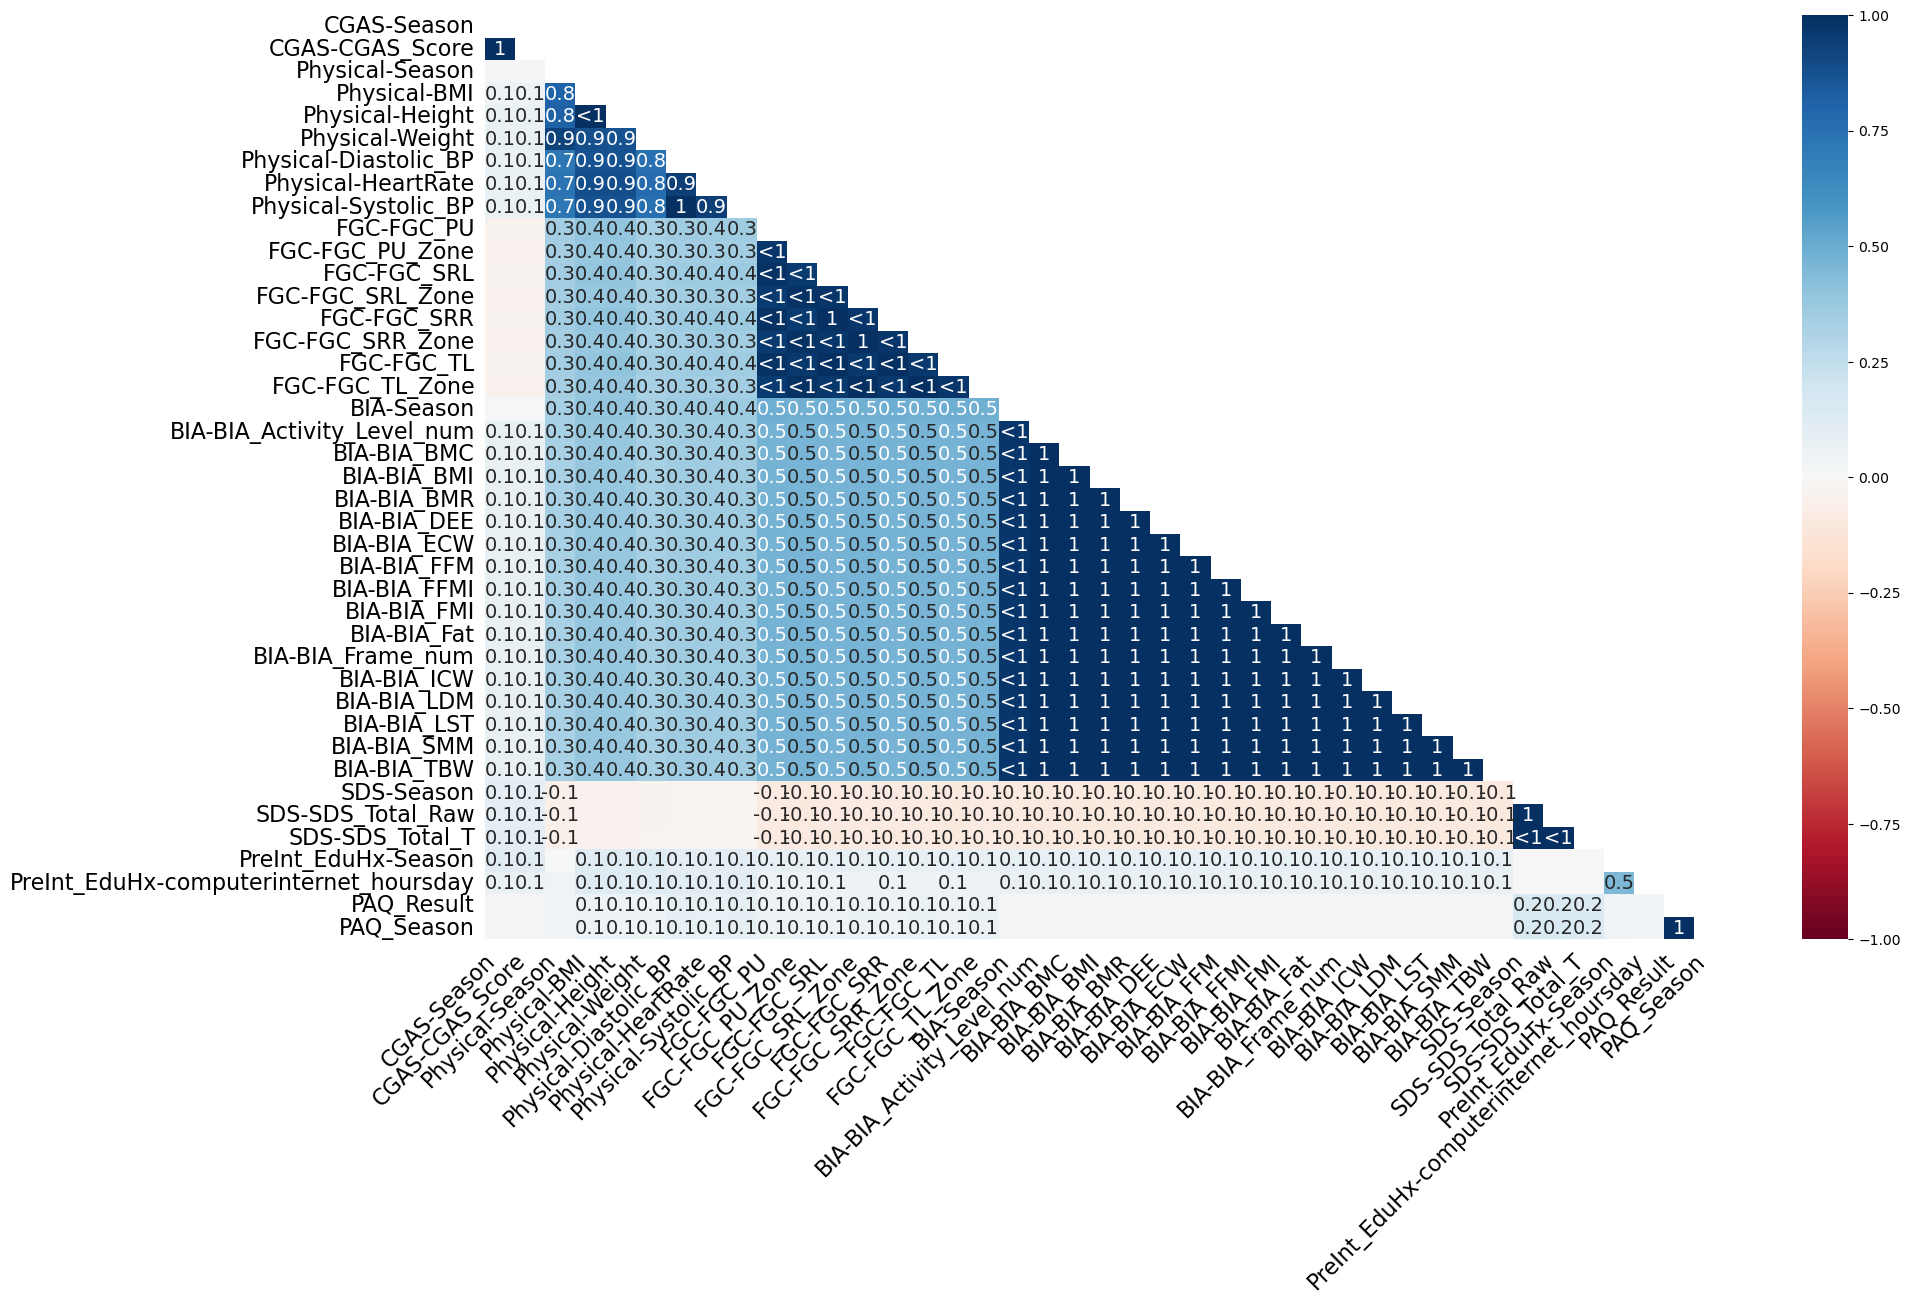

In [38]:
# IMPUTATION for 3 different types of datasets

# But first, check Missing Value Patterns 
# 1. Visualize Missing Data Patterns Use the missingno library to visualize patterns in missing data, which can help identify if values are missing randomly or with some structure.

import missingno as msno
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/3_train_clean_without_fitness_FGC.csv")

# Matrix plot of missing values
msno.matrix(df)
plt.show()

# Heatmap showing correlations between missing values
msno.heatmap(df)
plt.show()

'''
there doesnt seem to be a correlation between the missing values. so no pattern. missing at random it seems.
'''

In [49]:
'''Deciding whether to use mean or median imputation based on the distribution of the data

1. Consider the Distribution Shape
Symmetrical Distribution: If the data is symmetrically distributed (close to normal), mean imputation is often appropriate since the mean is a good representation of central tendency.
Skewed Distribution: If the data is skewed (e.g., income or age in some datasets), median imputation is generally better. The median is less affected by extreme values, making it more robust for skewed data.
How to Check for Symmetry:
Histogram or Box Plot: Visualize the data distribution.
Skewness: Calculate skewness to quantify asymmetry. If skewness is close to zero (typically between -0.5 and 0.5), the mean may be appropriate. If skewness is high, the median is preferable.

2. Consider the Presence of Outliers
Outliers: If there are extreme values (e.g., very high or low numbers relative to most of the data), they can pull the mean away from the center of the data, making mean imputation misleading. Median is typically better in such cases because it’s robust to outliers.

3. Data Type and Context
Continuous Data: For continuous data (e.g., height, weight, income), either mean or median can be used depending on skewness and outliers.
Discrete or Ordinal Data: For data with meaningful order (like age categories or rating scales), median imputation might align better since it reflects the central position.


'''


df = pd.read_csv("datasets/3_train_clean_without_fitness_FGC.csv")
df_numeric = df.select_dtypes(include=[float, int])

mean_imputation_columns = []
median_imputation_columns = []

# Apply mean or median imputation based on skewness
for column in df_numeric.columns:
    skewness = df_numeric[column].skew()

    # Determine imputation method based on skewness
    if abs(skewness) > 0.5:
        median_imputation_columns.append(column)
        print(f"Column '{column}': High skewness ({skewness:.2f}) - Recommended: Median Imputation")
    else:
        mean_imputation_columns.append(column)
        print(f"Column '{column}': Low skewness ({skewness:.2f}) - Recommended: Mean Imputation")

    # Determine imputation method based on skewness
    if abs(skewness) > 0.5:
        # Use median for skewed data
        df_numeric[column].fillna(df_numeric[column].median(), inplace=True)
        print(f"Imputed missing values in '{column}' with median due to high skewness (skewness = {skewness}).")
    else:
        # Use mean for approximately symmetric data
        df_numeric[column].fillna(df_numeric[column].mean(), inplace=True)
        print(f"Imputed missing values in '{column}' with mean (skewness = {skewness}).")

df.update(df_numeric)
modified_file_path = "datasets/imputed_or_complete/4-1_train_simple_imputed.csv"
df.to_csv(modified_file_path, index=False)


# print("\nColumns recommended for Mean Imputation:", mean_imputation_columns)
# print("Columns recommended for Median Imputation:", median_imputation_columns)



Column 'Basic_Demos-Age': High skewness (0.70) - Recommended: Median Imputation
Imputed missing values in 'Basic_Demos-Age' with median due to high skewness (skewness = 0.6963082777657641).
Column 'Basic_Demos-Sex': High skewness (0.56) - Recommended: Median Imputation
Imputed missing values in 'Basic_Demos-Sex' with median due to high skewness (skewness = 0.5638255299081598).
Column 'CGAS-CGAS_Score': Low skewness (-0.11) - Recommended: Mean Imputation
Imputed missing values in 'CGAS-CGAS_Score' with mean (skewness = -0.11067277304798348).
Column 'Physical-BMI': High skewness (1.40) - Recommended: Median Imputation
Imputed missing values in 'Physical-BMI' with median due to high skewness (skewness = 1.398169274237307).
Column 'Physical-Height': Low skewness (0.30) - Recommended: Mean Imputation
Imputed missing values in 'Physical-Height' with mean (skewness = 0.29617555617452646).
Column 'Physical-Weight': High skewness (1.16) - Recommended: Median Imputation
Imputed missing values in

In [40]:
'''
Pairwise Missingness Correlation: 
Calculate the correlation matrix of missing indicators (0 for observed, 1 for missing) 
for each pair of columns to see if the missingness of one column is related to another. python Copy code
'''
missing_corr = df.isnull().corr()
print(missing_corr)

# no correlation once again. values are missing at random. now that that's established, we can proceed with imputation.
'''
options:
1. mean/mode value imputation
2. conditional mean imputation
3. random imputation
4. KNN imputation
5. Multiple Imputation


and then handling outliers wont be needed in this case 

'''


                                        id  Basic_Demos-Enroll_Season  \
id                                     NaN                        NaN   
Basic_Demos-Enroll_Season              NaN                        NaN   
Basic_Demos-Age                        NaN                        NaN   
Basic_Demos-Sex                        NaN                        NaN   
CGAS-Season                            NaN                        NaN   
CGAS-CGAS_Score                        NaN                        NaN   
Physical-Season                        NaN                        NaN   
Physical-BMI                           NaN                        NaN   
Physical-Height                        NaN                        NaN   
Physical-Weight                        NaN                        NaN   
Physical-Diastolic_BP                  NaN                        NaN   
Physical-HeartRate                     NaN                        NaN   
Physical-Systolic_BP                   NaN         

In [51]:
# simpleimputer vs iterativeimputer

'''
SimpleImputer: Fills missing values using simple strategies like mean, median, most frequent value, or a constant.
IterativeImputer: Uses predictive modeling to impute values, cycling through each feature as a function of other features.
KNNImputer: Imputes missing values by finding k nearest neighbors and averaging their values.

'''

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.impute import KNNImputer
import pandas as pd

df = pd.read_csv("datasets/3_train_clean_without_fitness_FGC.csv")

df_numeric = df.select_dtypes(include=[float, int])

# # Example with SimpleImputer
# simple_imputer = SimpleImputer(strategy='mean')  # can also use 'median', 'most_frequent', etc.
# df_simple_imputed = pd.DataFrame(simple_imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# df_simple_imputed.to_csv("datasets/3_train_simple_imputed_sklearn_mean.csv", index=False)


# Example with IterativeImputer
iter_imputer = IterativeImputer()
df_iter_imputed = pd.DataFrame(iter_imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Update the original DataFrame with IterativeImputer results
df.update(df_iter_imputed)
df.to_csv("datasets/imputed_or_complete/4-2_train_iterative_imputed.csv", index=False)

# KNNImputer Example
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_numeric), columns=df_numeric.columns)

df.update(df_knn_imputed)
df.to_csv("datasets/imputed_or_complete/4-3_train_knn_imputed.csv", index=False)





/Users/pc/opt/anaconda3/envs/dsa/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pc/opt/anaconda3/envs/dsa/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/pc/opt/anaconda3/envs/dsa/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/pc/opt/anaconda3/envs/dsa/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

folder_path = "datasets/imputed_or_complete" 
output_folder = "datasets/imputed_or_complete/divided" 
os.makedirs(output_folder, exist_ok=True) 

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):  
        file_path = os.path.join(folder_path, file_name)
        print(f"dividing csv: {file_name}")
        
        data = pd.read_csv(file_path)

        X = data.drop(columns=["sii"])  
        y = data["sii"]  
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y if y.nunique() > 1 else None
        )
        
        base_name = os.path.splitext(file_name)[0]
        X_train.to_csv(os.path.join(output_folder, f"{base_name}_X_train.csv"), index=False)
        X_test.to_csv(os.path.join(output_folder, f"{base_name}_X_test.csv"), index=False)
        y_train.to_csv(os.path.join(output_folder, f"{base_name}_y_train.csv"), index=False)
        y_test.to_csv(os.path.join(output_folder, f"{base_name}_y_test.csv"), index=False)
        
        print(f"{file_name} divided successfully and saved in {output_folder}")



dividing csv: 2-2_train_iterative_imputed.csv
2-2_train_iterative_imputed.csv divided successfully and saved in datasets/imputed_or_complete/divided
dividing csv: 3-3_train_simple_imputed.csv
3-3_train_simple_imputed.csv divided successfully and saved in datasets/imputed_or_complete/divided
dividing csv: 3-2_train_knn_imputed.csv
3-2_train_knn_imputed.csv divided successfully and saved in datasets/imputed_or_complete/divided
dividing csv: 3-1_train_iterative_imputed.csv
3-1_train_iterative_imputed.csv divided successfully and saved in datasets/imputed_or_complete/divided
dividing csv: 2-1_train_simple_imputed.csv
2-1_train_simple_imputed.csv divided successfully and saved in datasets/imputed_or_complete/divided
dividing csv: 2-3_train_knn_imputed.csv
2-3_train_knn_imputed.csv divided successfully and saved in datasets/imputed_or_complete/divided
dividing csv: 1_COMPLETE_train_clean_without_fitness_FGC_no_nulls.csv
1_COMPLETE_train_clean_without_fitness_FGC_no_nulls.csv divided successf

In [6]:
folder_path = 'datasets/imputed_or_complete'  
output_text_file = 'datasets/datasets.txt'

with open(output_text_file, 'w') as outfile:
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_name_without_extension = os.path.splitext(filename)[0]
            outfile.write(file_name_without_extension + '\n')
            
print(f"All CSV files in {folder_path} have been written to {output_text_file}.")


All CSV files in datasets/imputed_or_complete have been written to datasets/datasets.txt.
